![](heart.png)

In [86]:
import numpy as np 
import pandas as pd
import statistics as st
import category_encoders as ce # импорт для работы с кодировщиком

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
heart = pd.read_csv('heart.csv')
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [88]:
heart['old']=heart['age'].apply(lambda x: 1 if x > 60 else 0)
display(heart.head(5))
heart['old'].sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


79

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.
![](bar.png)

In [89]:
def trestbps_mean(x):
    if x['age'] < 21:
      if x['sex'] == 1:
        return 123
      else:
        return 116
    
    elif x['age'] < 31:
      if x['sex'] == 1:
        return 126
      else:
        return 120

    elif x['age'] < 41:
      if x['sex'] == 1:
        return 129
      else:
        return 127

    elif x['age'] < 51:
      if x['sex'] == 1:
        return 135
      else:
        return 137

    elif x['age'] < 61:
      if x['sex'] == 1:
        return 142
      else:
        return 144

    elif x['age'] > 60:
      if x['sex'] == 1:
        return 142
      else:
        return 159

heart['trestbps_mean'] = heart[['age','sex']].apply(trestbps_mean, axis=1)

In [90]:
heart['trestbps_mean'].iloc [[300]]#выводим 300ю строку

300    142
Name: trestbps_mean, dtype: int64

In [91]:
df=heart.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [92]:
ord_encoder1 = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
heart_bin1 = ord_encoder1.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, heart_bin1], axis=1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


<AxesSubplot: title={'center': 'Распределения после RobustScaler'}, xlabel='chol', ylabel='Density'>

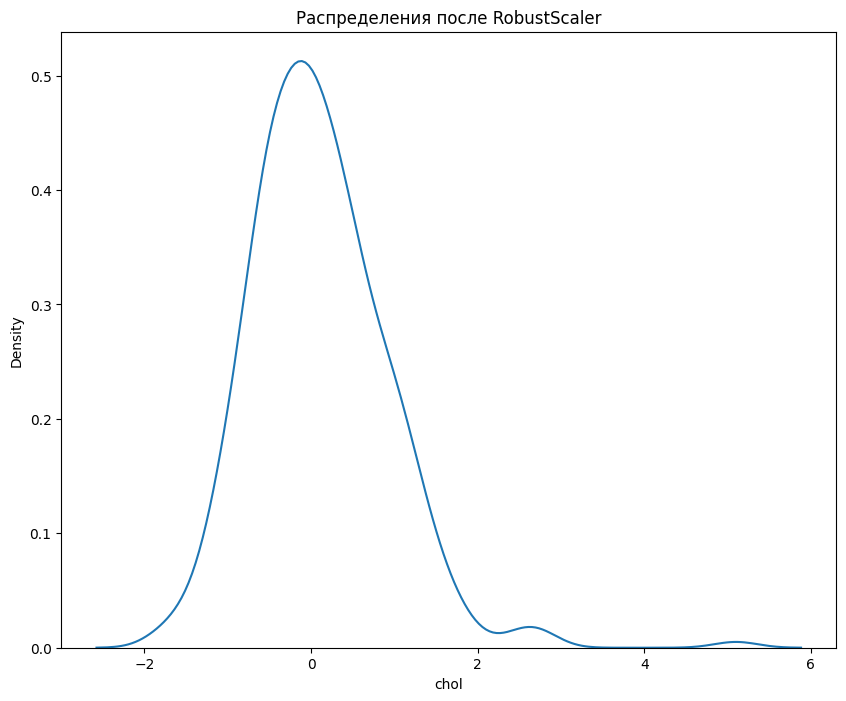

In [93]:
col_names = list(heart.columns)
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['chol'], ax=ax1)

In [96]:
print(round(st.stdev (df_r['chol']),6))

0.816232


<AxesSubplot: >

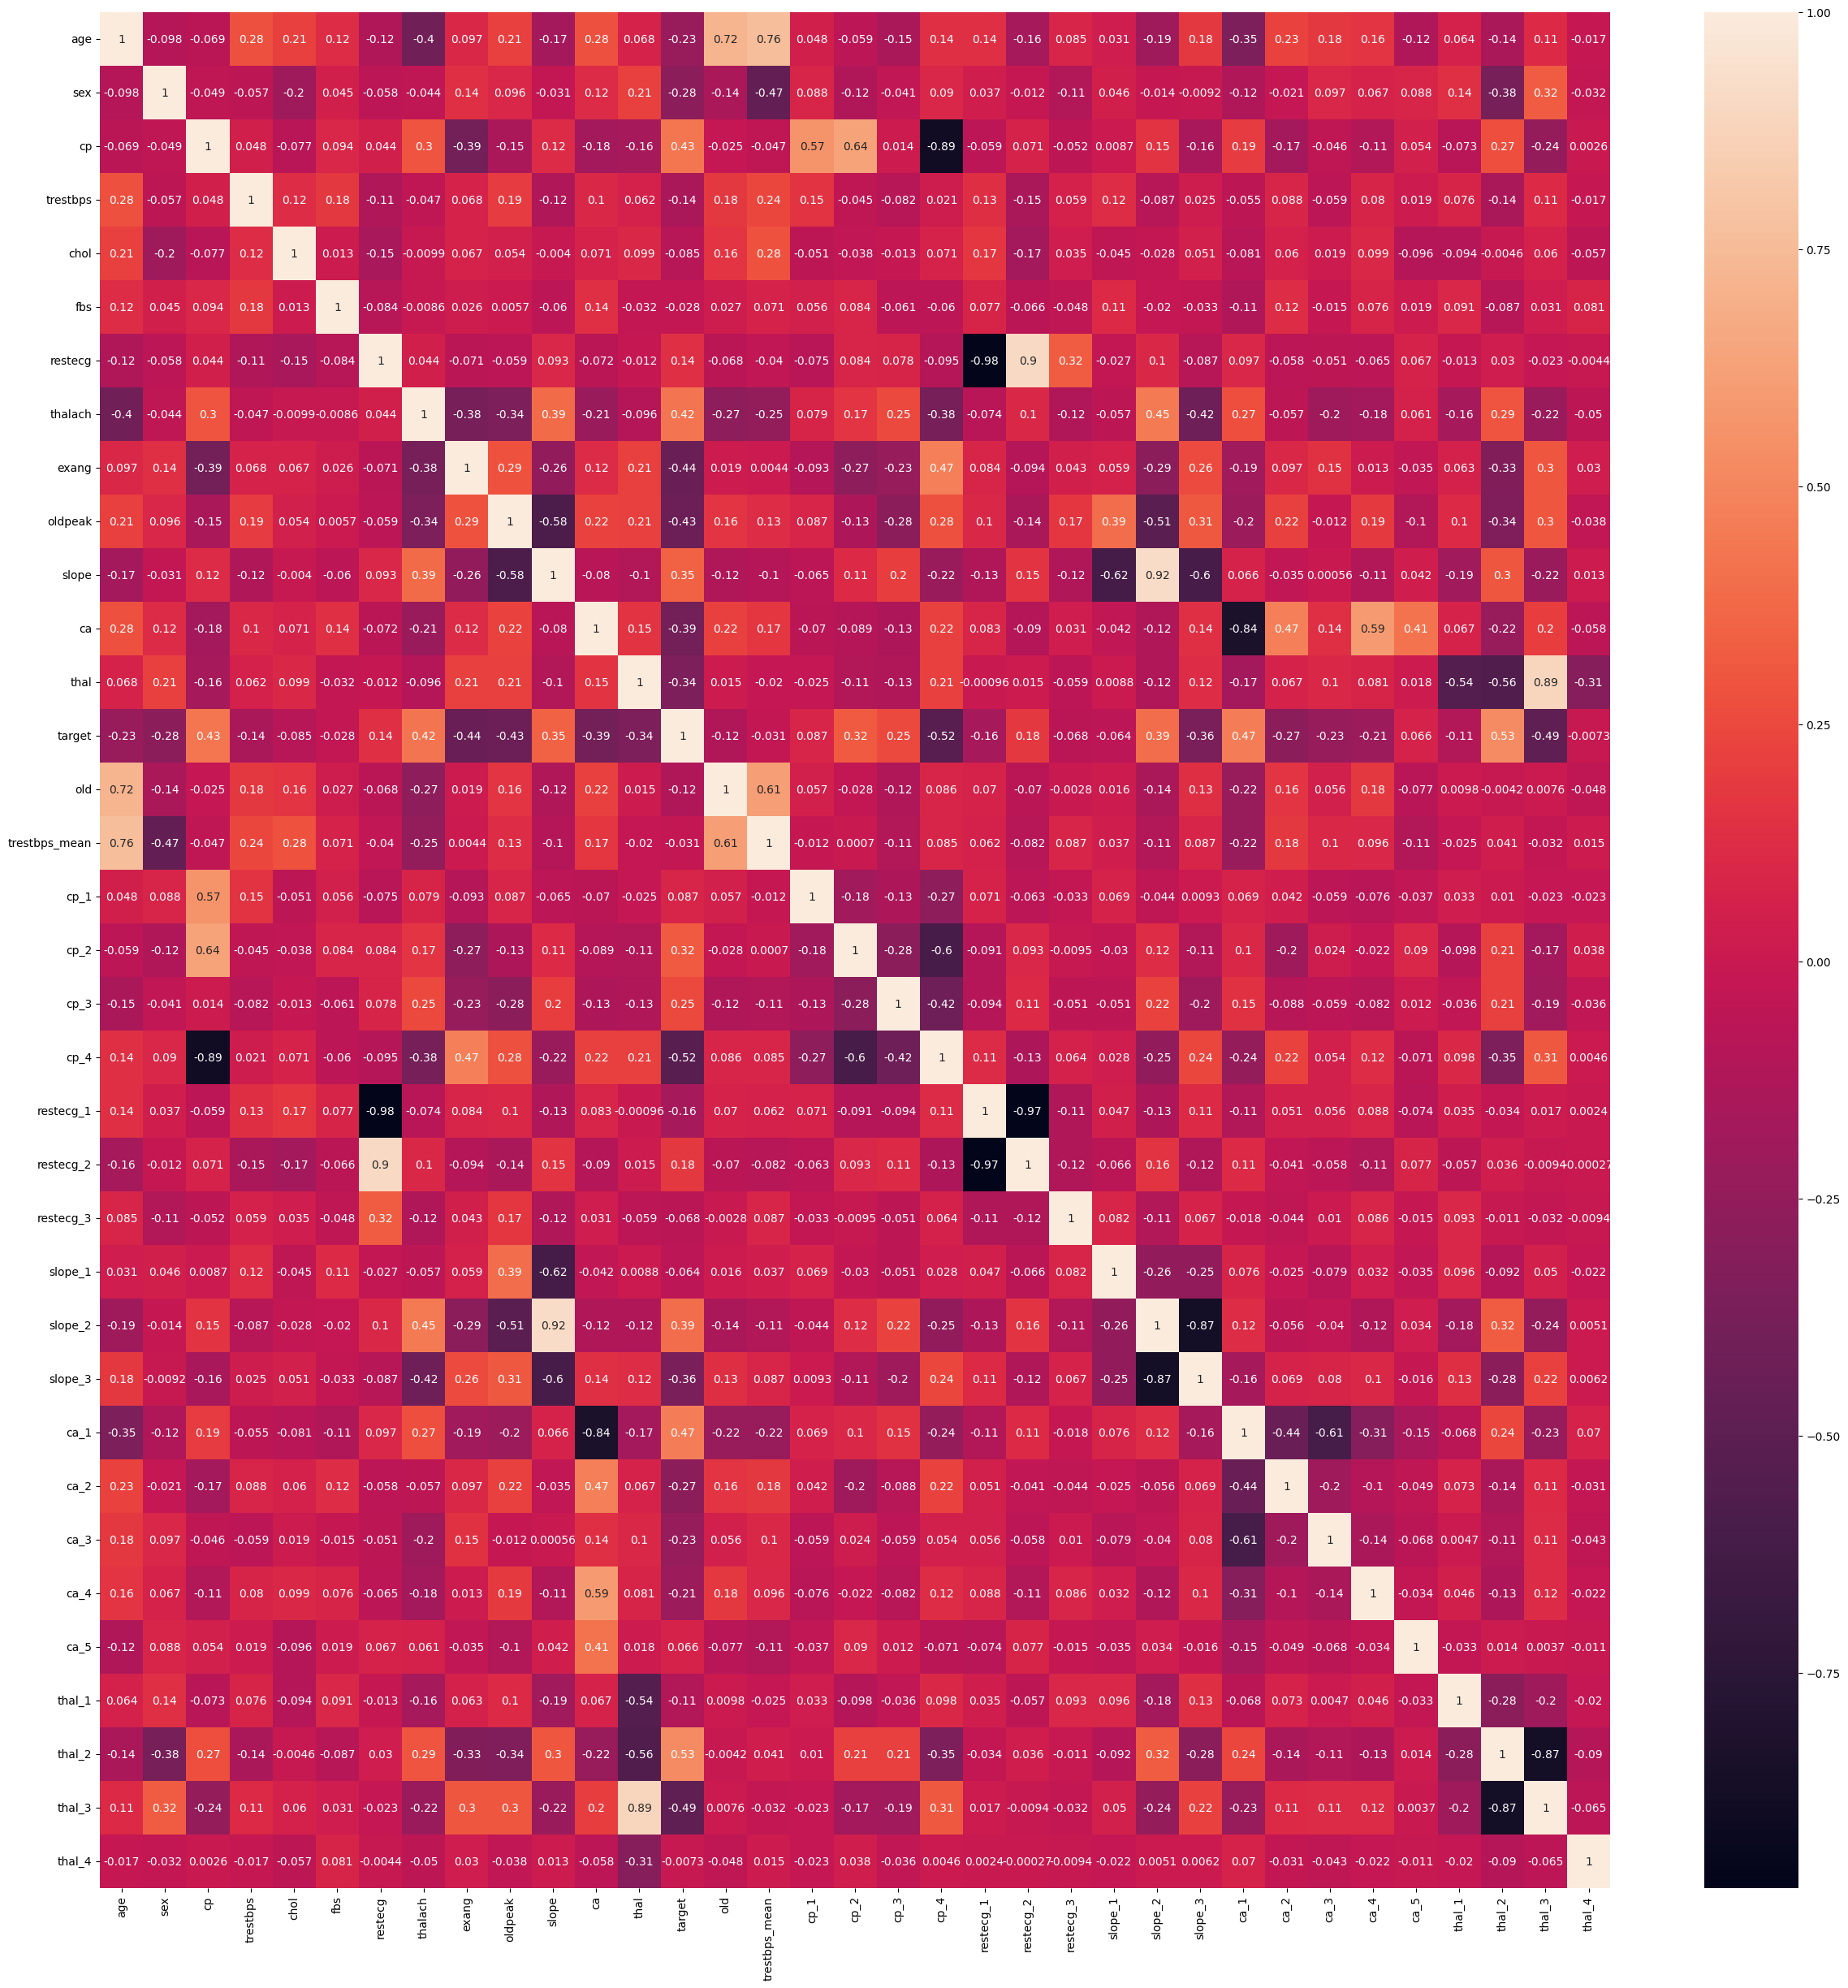

In [105]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df_r.corr(), annot=True) # включаем отображение коэффициентов